Define Hyperparameters and Paths

In [25]:
WELLS = ["VW1", "CCS1"]

FORMATIONS = [
    "Eau Claire",
    "Mt. Simon E",
    "Mt. Simon D",
    "Mt. Simon C",
    "Mt. Simon B",
    "Mt. Simon A",
    "Argenta",
    "Precambrian"
    ]


DATALOGS_PATH = "REU Project/Data/Raw CSV Files/raw_"
LABELS_PATH = "REU Project/Data/labels/label_"

Imports

In [3]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from statsmodels.stats.outliers_influence import variance_inflation_factor

Get Dataset and Scale it

In [26]:
datalogs = {}
labels = {}
datasets = {}
for well in WELLS:
  datalogs_df = pd.read_csv(DATALOGS_PATH + well + ".csv")
  labels_df = pd.read_csv(LABELS_PATH + well + ".csv")

  #filter rock formations considered
  datalogs_df = datalogs_df[datalogs_df["FORM"].isin(FORMATIONS)]

  datalogs[well] = datalogs_df
  print(well + str(datalogs_df.shape))
  labels[well] = labels_df

  dataset = pd.merge(datalogs_df, labels_df, on='DEPT')

  # Add a 'Well' and 'WEll-FORM' columns
  dataset['WELL'] = well

  datasets[well] = dataset

data = pd.concat(datasets.values())
print("Concatenated" + str(data.shape))

VW1(3999, 24)
CCS1(4217, 24)
Concatenated(8216, 27)


Scale Data

In [27]:
scaler = preprocessing.StandardScaler()
scaled_data = scaler.fit_transform(
    data.drop(['DEPT', 'WELL', 'HAS_FRAC', 'FORM', 'WELL-FORM'], axis=1))

Make TSNE

In [28]:
tsne = TSNE(random_state=42)
tsne_data = tsne.fit_transform(scaled_data)

Plot demarkating well, form, and fracture status for CCS1 and VW1 specifically

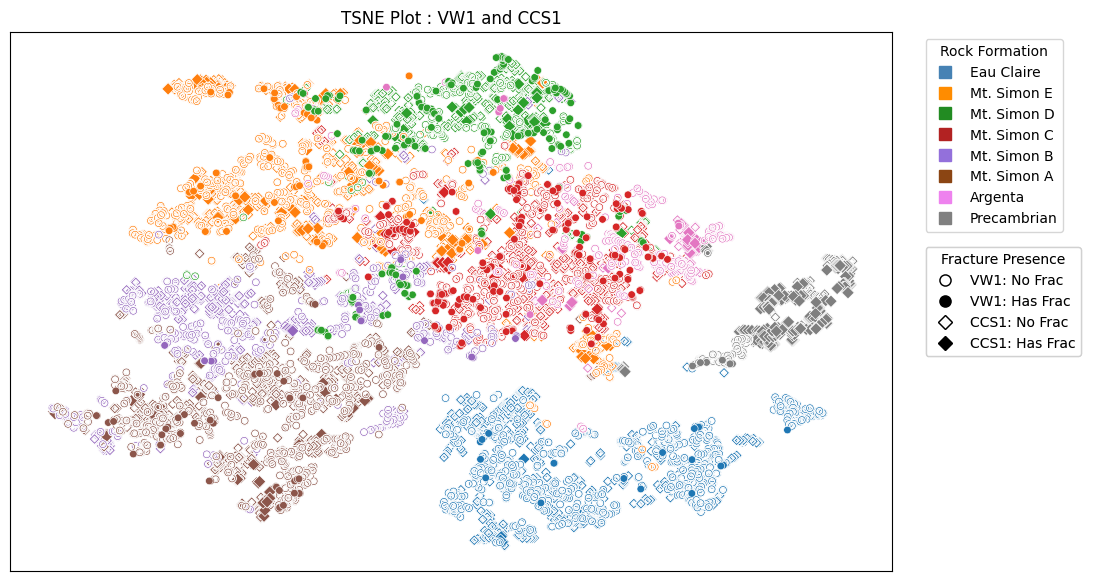

In [29]:
n_tsne_components = tsne_data.shape[1]  # Number of t-SNE components
tsne_df = pd.DataFrame(tsne_data, columns=[f'TSNE{i+1}' for i in range(n_tsne_components)])
tsne_df['FORM'] = data['FORM'].values
tsne_df["WELL"] = data["WELL"].values
tsne_df["HAS_FRAC"] = data["HAS_FRAC"].values

fig, axs = plt.subplots(1, 2, figsize=(14, 7), gridspec_kw={'width_ratios': [5, 1]})

well_markers = { #filling is weird with python, so incorporated LaTex Symbols
    "CCS1" : {1: 'o', 0: '$\circ$'},
    "VW1"  : {1: 'D', 0: '$\diamond$'}
}

CCS1_df = tsne_df[tsne_df["WELL"] == "CCS1"]
VW1_df = tsne_df[tsne_df["WELL"] == "VW1"]

scatter = sns.scatterplot(data=VW1_df[VW1_df["HAS_FRAC"] == 0], x="TSNE1", y="TSNE2", hue="FORM", style = "HAS_FRAC", markers=well_markers["VW1"], ax=axs[0], s=80)
scatter = sns.scatterplot(data=VW1_df[VW1_df["HAS_FRAC"] == 1], x="TSNE1", y="TSNE2", hue="FORM", style = "HAS_FRAC", markers=well_markers["VW1"], ax=axs[0], s=40)
scatter = sns.scatterplot(data=CCS1_df[CCS1_df["HAS_FRAC"] == 0], x="TSNE1", y="TSNE2", hue="FORM", style = "HAS_FRAC", markers=well_markers["CCS1"], ax=axs[0], s=90)
scatter = sns.scatterplot(data=CCS1_df[CCS1_df["HAS_FRAC"] == 1], x="TSNE1", y="TSNE2", hue="FORM", style = "HAS_FRAC", markers=well_markers["CCS1"], ax=axs[0], s=30)

scatter.legend_.remove()
custom_legend1 = [
    plt.Line2D([], [], marker='s', color='steelblue', markersize=8, linestyle='None'),
    plt.Line2D([], [], marker='s', color='darkorange', markersize=8, linestyle='None'),
    plt.Line2D([], [], marker='s', color='forestgreen', markersize=8, linestyle='None'),
    plt.Line2D([], [], marker='s', color='firebrick', markersize=8, linestyle='None'),
    plt.Line2D([], [], marker='s', color='mediumpurple', markersize=8, linestyle='None'),
    plt.Line2D([], [], marker='s', color='saddlebrown', markersize=8, linestyle='None'),
    plt.Line2D([], [], marker='s', color='violet', markersize=8, linestyle='None'),
    plt.Line2D([], [], marker='s', color='gray', markersize=8, linestyle='None')
]
legend_labels1 = ["Eau Claire", "Mt. Simon E", "Mt. Simon D", "Mt. Simon C",
"Mt. Simon B", "Mt. Simon A", "Argenta", "Precambrian"]

custom_legend2 = [
    plt.Line2D([], [], marker='o', color='black', markersize=8, linestyle='None', fillstyle="none"),
    plt.Line2D([], [], marker='o', color='black', markersize=8, linestyle='None'),
    plt.Line2D([], [], marker='D', color='black', markersize=7, linestyle='None', fillstyle ="none"),
    plt.Line2D([], [], marker='D', color='black', markersize=7, linestyle='None'),
]
legend_labels2 = ["VW1: No Frac", "VW1: Has Frac", "CCS1: No Frac", "CCS1: Has Frac"]

# Set the main legend title and position
legend_section1 = axs[1].legend(custom_legend1, legend_labels1, title='Rock Formation', loc='upper left')
legend_section2 = axs[1].legend(custom_legend2, legend_labels2, title='Fracture Presence', loc='center left')
axs[1].add_artist(legend_section1)
axs[1].add_artist(legend_section2)

axs[0].set_xlabel('')
axs[0].set_ylabel('')
axs[0].set_xticks([])
axs[0].set_yticks([])

# axs[1].legend(handles, labels, loc='center', fontsize='large')
axs[1].axis('off')
plt.subplots_adjust(wspace=0.05)

axs[0].set_title("TSNE Plot : VW1 and CCS1")

plt.show()
#fig.savefig('myimage.png', format='png', dpi=1200)

Plot TSNE Colored By Well

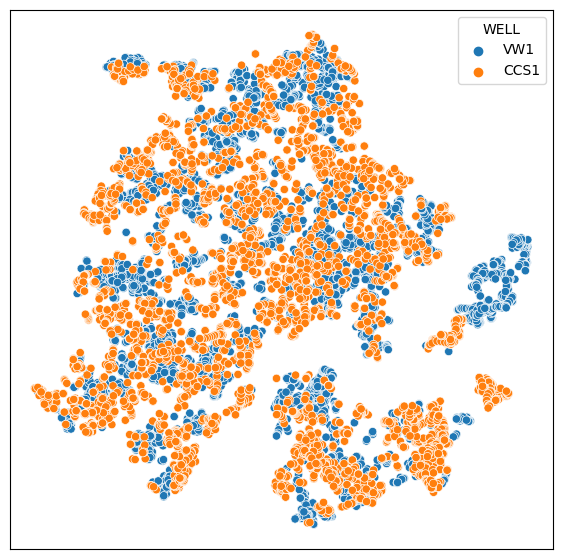

In [30]:
n_tsne_components = tsne_data.shape[1]  # Number of t-SNE components
tsne_df = pd.DataFrame(tsne_data,
                       columns=[f'TSNE{i+1}' for i in range(n_tsne_components)])
tsne_df['WELL'] = data['WELL'].values

plt.figure(figsize=(7,7))
sns.scatterplot(data=tsne_df, x="TSNE1", y="TSNE2", hue="WELL")
plt.yticks([])
plt.xticks([])
plt.xlabel("")
plt.ylabel("")

#fig.savefig('TSNEByWell.png', format='png', dpi=1200)
plt.show()

Plot TSNE Colored By Fracture Status

<Axes: xlabel='TSNE1', ylabel='TSNE2'>

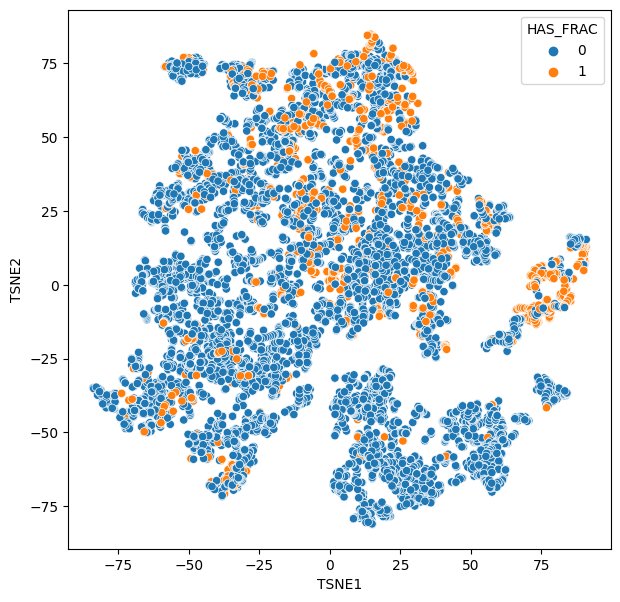

In [31]:
n_tsne_components = tsne_data.shape[1]  # Number of t-SNE components
tsne_df = pd.DataFrame(tsne_data,
                       columns=[f'TSNE{i+1}' for i in range(n_tsne_components)])
tsne_df['HAS_FRAC'] = data['HAS_FRAC'].values

plt.figure(figsize=(7,7))
sns.scatterplot(data=tsne_df, x="TSNE1", y="TSNE2", hue="HAS_FRAC")

Plot TSNE characterized by rock formation and well

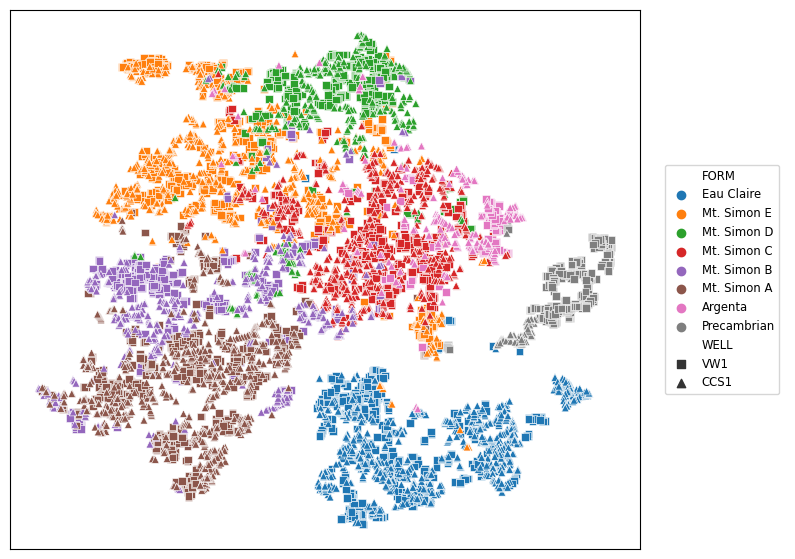

In [39]:
n_tsne_components = tsne_data.shape[1]  # Number of t-SNE components
tsne_df = pd.DataFrame(tsne_data,
                       columns=[f'TSNE{i+1}' for i in range(n_tsne_components)])
tsne_df['FORM'] = data['FORM'].values
tsne_df["WELL"] = data["WELL"].values

fig, axs = plt.subplots(1, 2, figsize=(10, 7),
                        gridspec_kw={'width_ratios': [5, 1]})

#add markers to data
marker_types = {"VW1" : "s", "CCS1": "^", "VW2": "D"}

scatter = sns.scatterplot(data=tsne_df, x="TSNE1", y="TSNE2", hue="FORM",
                          style="WELL", markers=marker_types, ax=axs[0], s=30)

scatter.legend_.remove()
handles, labels = scatter.get_legend_handles_labels()
axs[1].legend(handles, labels, loc='center', fontsize='small')
axs[1].axis('off')
plt.subplots_adjust(wspace=0.05)

axs[0].set_xticks([])
axs[0].set_yticks([])
axs[0].set_xlabel('')
axs[0].set_ylabel('')

plt.show()

Plot TSNE characterized by rock formation and fracture status for wells CCS1 and VW1

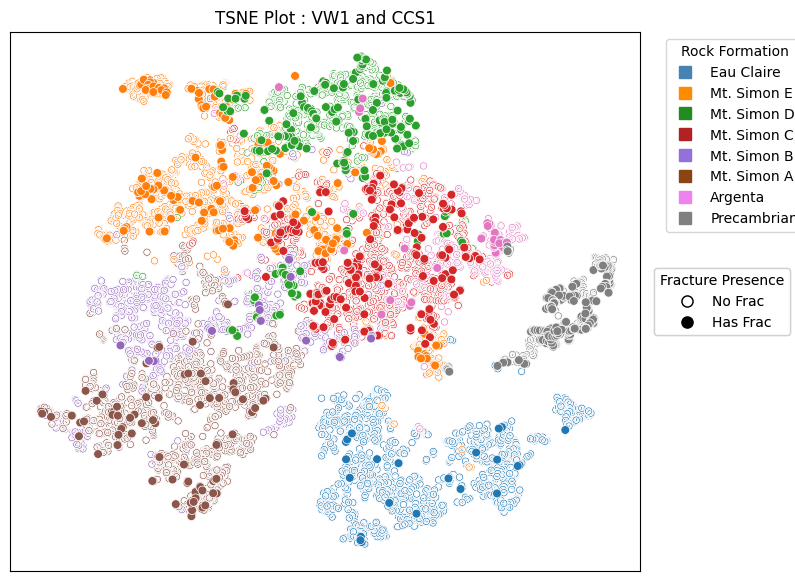

In [40]:
n_tsne_components = tsne_data.shape[1]  # Number of t-SNE components
tsne_df = pd.DataFrame(tsne_data, columns=[f'TSNE{i+1}' for i in range(n_tsne_components)])
tsne_df['FORM'] = data['FORM'].values
tsne_df["WELL"] = data["WELL"].values
tsne_df["HAS_FRAC"] = data["HAS_FRAC"].values

fig, axs = plt.subplots(1, 2, figsize=(10, 7), gridspec_kw={'width_ratios': [5, 1]})

scatter = sns.scatterplot(data=tsne_df[tsne_df["HAS_FRAC"] == 0], x="TSNE1", y="TSNE2", hue="FORM", style="HAS_FRAC", markers = {1: 'o', 0: '$\circ$'}, ax=axs[0], s=80)
scatter = sns.scatterplot(data=tsne_df[tsne_df["HAS_FRAC"] == 1], x="TSNE1", y="TSNE2", hue="FORM", style = "HAS_FRAC", markers= {1: 'o', 0: '$\circ$'}, ax=axs[0], s=40)

scatter.legend_.remove()
custom_legend1 = [
    plt.Line2D([], [], marker='s', color='steelblue', markersize=8, linestyle='None'),
    plt.Line2D([], [], marker='s', color='darkorange', markersize=8, linestyle='None'),
    plt.Line2D([], [], marker='s', color='forestgreen', markersize=8, linestyle='None'),
    plt.Line2D([], [], marker='s', color='firebrick', markersize=8, linestyle='None'),
    plt.Line2D([], [], marker='s', color='mediumpurple', markersize=8, linestyle='None'),
    plt.Line2D([], [], marker='s', color='saddlebrown', markersize=8, linestyle='None'),
    plt.Line2D([], [], marker='s', color='violet', markersize=8, linestyle='None'),
    plt.Line2D([], [], marker='s', color='gray', markersize=8, linestyle='None')
]
legend_labels1 = ["Eau Claire", "Mt. Simon E", "Mt. Simon D", "Mt. Simon C",
"Mt. Simon B", "Mt. Simon A", "Argenta", "Precambrian"]

custom_legend2 = [
    plt.Line2D([], [], marker='o', color='black', markersize=8, linestyle='None', fillstyle="none"),
    plt.Line2D([], [], marker='o', color='black', markersize=8, linestyle='None'),
]
legend_labels2 = ["No Frac", "Has Frac"]

# Set the main legend title and position
legend_section1 = axs[1].legend(custom_legend1, legend_labels1, title='Rock Formation', loc='upper left')
legend_section2 = axs[1].legend(custom_legend2, legend_labels2, title='Fracture Presence', loc='center')
axs[1].add_artist(legend_section1)
axs[1].add_artist(legend_section2)

axs[0].set_xlabel('')
axs[0].set_ylabel('')
axs[0].set_xticks([])
axs[0].set_yticks([])

#axs[1].legend(handles, labels, loc='center', fontsize='large')
axs[1].axis('off')
plt.subplots_adjust(wspace=0.05)

axs[0].set_title("TSNE Plot : VW1 and CCS1")

plt.show()
#fig.savefig('myimage.png', format='png', dpi=1200)

Make TSNE plots colored by each feature to see clustering paterns based on feature

In [45]:
for feat_of_int in data.columns:
  n_tsne_components = tsne_data.shape[1]  # Number of t-SNE components
  tsne_df = pd.DataFrame(tsne_data,
                         columns=[f'TSNE{i+1}' for i in range(n_tsne_components)])
  tsne_df[feat_of_int] = data[feat_of_int].values

  fig, axs = plt.subplots(1, 2, figsize=(10, 7),
                          gridspec_kw={'width_ratios': [5, 1]})

  # Plot the scatter plot on the main figure
  scatter = sns.scatterplot(data=tsne_df, x="TSNE1", y="TSNE2",
                            hue=feat_of_int, ax=axs[0])
  handles, labels = scatter.get_legend_handles_labels()
  scatter.legend_.remove()
  axs[1].legend(handles, labels, loc='center', fontsize='small',
                title=feat_of_int + " Values")
  axs[1].axis('off')
  axs[0].set_title("TSNE Colored By " + feat_of_int, loc='center', pad=20)
  plt.subplots_adjust(wspace=0.05)
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

Clean Legends I Used For Poster

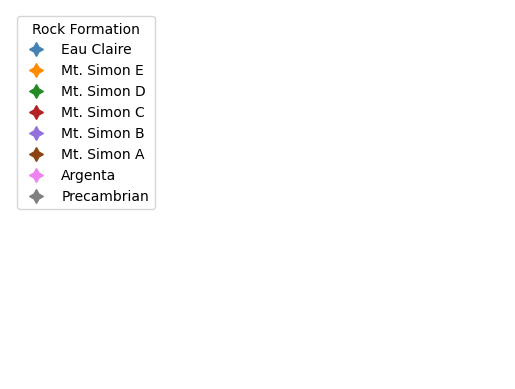

In [42]:
fig, ax = plt.subplots()
custom_legend1 = [
    plt.Line2D([], [], marker=(4, 1, 0), color='steelblue', markersize=10, linestyle='None'),
    plt.Line2D([], [], marker=(4, 1, 0), color='darkorange', markersize=10, linestyle='None'),
    plt.Line2D([], [], marker=(4, 1, 0), color='forestgreen', markersize=10, linestyle='None'),
    plt.Line2D([], [], marker=(4, 1, 0), color='firebrick', markersize=10, linestyle='None'),
    plt.Line2D([], [], marker=(4, 1, 0), color='mediumpurple', markersize=10, linestyle='None'),
    plt.Line2D([], [], marker=(4, 1, 0), color='saddlebrown', markersize=10, linestyle='None'),
    plt.Line2D([], [], marker=(4, 1, 0), color='violet', markersize=10, linestyle='None'),
    plt.Line2D([], [], marker=(4, 1, 0), color='gray', markersize=10, linestyle='None')
]
legend_labels1 = ["Eau Claire", "Mt. Simon E", "Mt. Simon D", "Mt. Simon C",
"Mt. Simon B", "Mt. Simon A", "Argenta", "Precambrian"]

# Set the main legend title and position
legend_section1 = ax.legend(custom_legend1, legend_labels1, title='Rock Formation', loc='upper left')

ax.axis('off')
plt.show()
#fig.savefig('RockFormationLegend.png', format='png', dpi=1200)

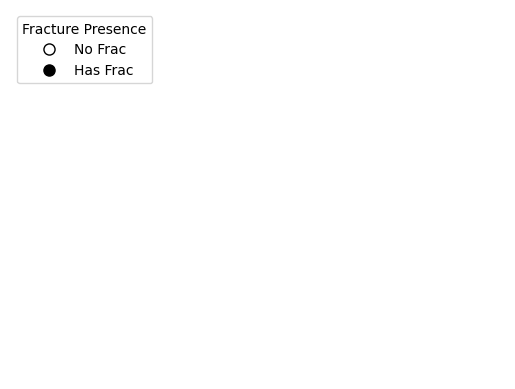

In [43]:
fig, ax = plt.subplots()
custom_legend2 = [
    plt.Line2D([], [], marker='o', color='black', markersize=8, linestyle='None', fillstyle="none"),
    plt.Line2D([], [], marker='o', color='black', markersize=8, linestyle='None'),
]
legend_labels2 = ["No Frac", "Has Frac"]

legend_section2 = ax.legend(custom_legend2, legend_labels2, title='Fracture Presence', loc='upper left')
ax.axis('off')
plt.show()
#fig.savefig('myimage.png', format='png', dpi=1200)

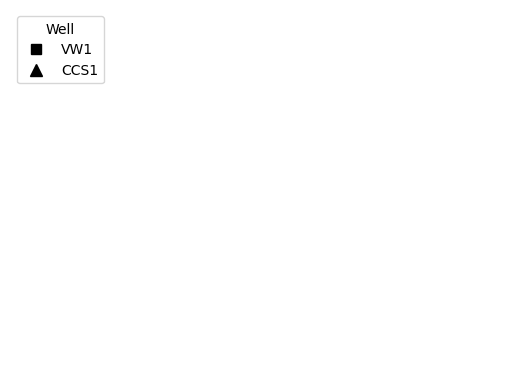

In [44]:
fig, ax = plt.subplots()
custom_legend3 = [
    plt.Line2D([], [], marker='s', color='black', markersize=7, linestyle='None'),
    plt.Line2D([], [], marker='^', color='black', markersize=8, linestyle='None'),
]
legend_labels3 = ["VW1", "CCS1"]

legend_section3 = ax.legend(custom_legend3, legend_labels3, title='Well', loc='upper left')
ax.axis('off')
plt.show()
#fig.savefig('myimage.png', format='png', dpi=1200)